Lo primero que tenemos que hacer es importar las librerias que vamos a usar

In [1]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import statistics

Como vamos a generar dataframes y datasets aleatorios, vamos a definir una seed para que nos de todo el rato los mismos datos.

In [2]:
random.seed(123)

A continuación, vamos a definir las funciones para generar la información que vamos a necesitar pasar a las funciones. Para generar un dataset tenemos que indicar en número de filas y de columnas que queremos. 

In [3]:
def create_dataset(num_rows, num_columns):
    # Creamos una lista vacía que almacenará los datos del dataset
    data = []

    # Generamos los datos del dataset
    for i in range(num_rows):
        row = []
        for j in range(num_columns):
            # Generamos un número aleatorio para cada columna
            value = random.randint(0, 100)
            row.append(value)
        # Añadimos la fila al dataset
        data.append(row)

    # Devolvemos el dataset
    return data


Sin embargo, a la hora de crear el Dataframe, necesitamos pasarle a la función los parámetros i, j y n, donde i es el número más bajo que puede aparecer, j el más altó y n el número fílas que queremos generar. En todo caso, siempre se van a generar Dataframes de 2 columnas.

In [4]:
#i numero más bajo, j el más alto, n, numero de filas
def generate_df(i, j, n):
    rows = [[random.randint(i, j), random.choice([True, False])] for _ in range(n)]
    df = pd.DataFrame(rows, columns=['value', 'label'])
    return df

Vamos a generar el dataframe y el dataset que vamos a usar

In [61]:
df = generate_df(0, 100, 150)
dataset = create_dataset(10, 5)
array = [random.randint(1, 100) for _ in range(20)]


En esta función, recibimos como entrada un vector de tipo numérico y un
número de intervalos para implementar la discretización del ropio vector que se da como entrada mediante el método equal width.

In [62]:
def discretizeEW(x, num_bins):

    max_x = max(x)
    min_x = min(x)
    inter = int((max_x - min_x) / num_bins)
    aux = []
    cut_points = []
    for i in range(0, num_bins + 1):
        aux = aux + [min(x) + inter * i]
    x_discretized = []
    cut_points += aux

    for i in range(0, num_bins):
        data = []
        for j in x:
            if j >= aux[i] and j <= aux[i + 1]:
                data += [j]
        x_discretized += [data]
    print(x_discretized)
    print(cut_points)
    return (x_discretized, cut_points)
print(array)
discretizeEW(array, 3)

[28, 69, 11, 38, 34, 18, 98, 100, 49, 35, 75, 87, 7, 13, 16, 29, 80, 60, 7, 99]
[[28, 11, 38, 34, 18, 35, 7, 13, 16, 29, 7], [69, 38, 49, 60], [69, 98, 100, 75, 87, 80, 99]]
[7, 38, 69, 100]


([[28, 11, 38, 34, 18, 35, 7, 13, 16, 29, 7],
  [69, 38, 49, 60],
  [69, 98, 100, 75, 87, 80, 99]],
 [7, 38, 69, 100])

En esta función, al igual que en la anterior, recibimos un vector de tipo numérico y un número de intervalos. La diferencia esta que, en este caso, discretizamos el vector con el método equal frequency.

In [63]:
def discretizeEF(x, num_bins):
    n = int(len(x) / num_bins)
    cut_points = []
    for i in range(0, num_bins):
        x_discretized = []
        for j in range(i * n, (i + 1) * n):
            if j < len(x):
                x_discretized = x_discretized + [x[j]]
        #print(x_discretized)
        cut_points = cut_points + [x[j]]

    #print(cut_points)
    return (x_discretized, cut_points)

discretizeEF(array, 3) 

([7, 13, 16, 29, 80, 60], [18, 87, 60])

A continuación, vamos a calcular la entropía de un vector numérico. Para ello, nos vamos a atudar de la función contar que, dado el vector numérico, el elemento actual y la lista auxiliar, mira si el elemento está en la lista auxiliar. En caso de que no esté, suma uno al contador. Finalmente, añade el elemento a la lista auxiliar. 

Gracias a la función contar, podemos saber cuantos elementos diferentes entre si contiene el array.

In [64]:
def entropy(x):
    tam = len(x)
    pi = [0] * len(np.unique(x))
    aux = []
    i = 0
    for j in x:
        if not j in aux:
            pi[i], aux = contar(x, j, aux)
            i += 1

    sum = 0
    for i in range(0, len(pi)):
        sum += -( pi[i] / tam) * np.log2( pi[i]/ tam)
    return sum


def contar(x, elem, aux):
    cont = 0
    for j in range(0, len(x)):
        act = x[j]
        if not elem in aux and act == elem:
            cont += 1
    aux = aux + [elem]
    return cont, aux
entropy(array)

4.221928094887362

Con la función column_variances, calculamos la varianza que tiene cada columna de un dataframe teniendo en cuenta que el dataframe puede tener varias columnas o una única.


In [40]:
def column_variances(matrix):
  if isinstance(matrix, pd.DataFrame):
      matrix = matrix.to_numpy()
  if len(matrix.shape) == 2:
      # Calculamos la media aritmética de cada columna
      means = matrix.mean(axis=0)
      # Calculamos la varianza de cada columna
      vari = [(sum((matrix[:,i] - means[i])**2)/len(matrix[:,i])) for i in range(matrix.shape[1])]
  else:
      # Si la matriz solo tiene una columna, calculamos la varianza de esa columna
      mean = matrix.mean()
      vari = sum((matrix - mean)**2)/len(matrix)

  return vari
print(column_variances(df))

[844.8233333333327, 0.2424888888888888]


En este caso, calculamos la entropia de cada columna de un dataframe usando la función entropy que hemos implementado con anterioridad

In [38]:
def column_entropy(df):
    # Creamos una lista para almacenar los resultados de la entropía de cada columna
    entropies = []
    # Iteramos por cada columna del dataframe
    for col in df.columns:
        # Calculamos la entropía de la columna actual y la añadimos a la lista
        entropies.append(entropy(df[col]))
    # Devolvemos la lista con los resultados de la entropía de cada columna
    return entropies
print(column_entropy(df))

6.0531996068885086
0.9782176659354247
[6.0531996068885086, 0.9782176659354247]


Ahora bien, una vez implementadas las funciones column_variances() y colum_entropy(), implementamos la función filter_variables() donde le pasamos el datafreme y los límites por los que queremos filtrar los datos para crear el nuevo dataframe.

In [37]:
def filter_variables(df, entropy_threshold, variance_threshold):
    # Calculamos la varianza y la entropía de cada columna
    variances = column_variances(df)
    entropies = column_entropy(df)

    # Filtramos las columnas que cumplen con los requisitos
    filtered_columns = []
    for i, col in enumerate(df.columns):
        if entropies[i] >= entropy_threshold and variances[i] >= variance_threshold:
            filtered_columns.append(col)

    # Creamos el nuevo dataset con las columnas filtradas
    filtered_df = df[filtered_columns]

    return filtered_df
print(filter_variables(df, 1, 1))

6.0531996068885086
0.9782176659354247
     value
53       0
58       1
38       1
23       1
137      2
..     ...
24      98
106     99
73      99
85      99
104    100

[150 rows x 1 columns]


Ahora bien. Vamos a calcular el area bajo la curva ROC. Para ello, vamos a usar la función auxiliar auc_aux() en la que, una vez calculados los ratios de falsos positivos y verdaderos positibos, va calculando y sumando el area bajo la curva. 

In [29]:
def auc_aux(fpr, tpr):
    # Inicializa la variable que almacenará el área bajo la curva
    area = 0
    # Recorre los valores de fpr y tpr de dos en dos
    for i in range(len(fpr) - 1):
        # Calcula la base mayor, la base menor y la altura
        base_mayor = fpr[i + 1] - fpr[i]
        base_menor = tpr[i + 1] - tpr[i]
        altura = tpr[i + 1]
        # Calcula el área del trapecio y la acumula
        area += (base_mayor + base_menor) * altura / 2
    # Devuelve el área bajo la curva
    return area

def AUC(df):
    df.sort_values(by='value', inplace=True)

    # Obtiene el mínimo y el máximo del dataframe
    min_value = df['value'].min()
    max_value = df['value'].max()

    # Genera 50 valores de corte equidistantes entre el mínimo y el máximo
    cutoffs = np.linspace(min_value, max_value, 50)

    # Lista para almacenar las etiquetas reales

    # Variables para almacenar los valores acumulados de TP, TN, FP y FN
    tp_total = 0
    tn_total = 0
    fp_total = 0
    fn_total = 0

    predictions = []
    labels = []
    # Recorre cada valor de corte
    for cutoff in cutoffs:
        # Crea una lista de predicciones para el valor de corte actual
        prediction = [1 if x > cutoff else 0 for x in df['value']]
        predictions.append(prediction)
        # Crea una copia de la lista de etiquetas para el valor de corte actual
        labels.append(list(df['label']))


    # Listas para almacenar los valores de TPR y FPR
    tprs = []
    fprs = []
    # Recorre los valores de corte
    for i in range(len(cutoffs)):
        # Recorre cada fila del dataframe
        for _, row in df.iterrows():
            prediction = 1 if row['value'] > cutoffs[i] else 0
            label = row['label']
            # Acumula los valores de TP, TN, FP y FN según corresponda
            tp_total += 1 if prediction == 1 and label == 1 else 0
            tn_total += 1 if prediction == 0 and label == 0 else 0
            fp_total += 1 if prediction == 1 and label == 0 else 0
            fn_total += 1 if prediction == 0 and label == 1 else 0
            # Calcula el TPR y el FPR para la combinación actual de valores de corte
            if tp_total + fn_total == 0:
                tpr = 0
            else:
                tpr = tp_total / (tp_total + fn_total)

            if fp_total + tn_total == 0:
                fpr = 0
            else:
                fpr = fp_total / (fp_total + tn_total)

            # Añade los valores a las listas
            tprs = tuple(list(tprs) + [tpr])
            fprs = tuple(list(fprs) + [fpr])

        # Ordena los valores de fpr y tpr
        tprs, fprs = zip(*sorted(zip(tprs, fprs)))
        tp_total, tn_total, fp_total, fn_total = 0, 0, 0, 0
        # tuple(tprs)
        # tuple(fprs)

    # # Calcula el área bajo la curva ROC
    roc_auc = auc_aux(tprs, fprs)
    #
    #
    # # Imprime el área bajo la curva ROC
    print(roc_auc)
    return tprs, fprs
print(AUC(df))

3.143783668622272
((0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 

Una vez calculado el AUC, procedemos a visualizarlo

(0, 0, 0.0, 0.0, 0.0, 0.0, 0.0, 0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0

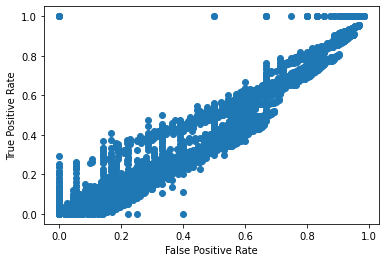

In [26]:
def plot_auc(data):
    fprs, tprs = AUC(data)
    plt.scatter(fprs, tprs)
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

plot_auc(df)

Ahora bien, vamos a normalizar los datos del dataset. Para ello, tenemos que tener en cuenta que los datos pueden ser de tipo numeric o categorical. En cualquier caso, para poder normalizarlos o estandarizarlos, los datos tienen que ser numéricos. Dependiendo de la opción que se quiera, es decir, normalizar o estandarizar, se realizara de forma diferente,

In [24]:
def normalize_dataset(dataset, option):
    print(0)
    min_value = min(dataset[0])
    max_value = max(dataset[0])
    mean_value = sum(dataset[0]) / len(dataset[0])
    std_value = (sum((x - mean_value) ** 2 for x in dataset[0]) / len(dataset[0])) ** 0.5
    for i in range(len(dataset)):
        for j in range(len(dataset[i])):
            if type(dataset[i][j]) is int or type(dataset[i][j]) is float:
                if option == "normalize":
                    dataset[i][j] = round((dataset[i][j] - min_value) / (max_value - min_value), 4)
                elif option == "standardize":
                    dataset[i][j] = round((dataset[i][j] - mean_value) / std_value, 4)
    return dataset
dataset = create_dataset(10, 8)
print("Dataset normalizado: ")
print(normalize_dataset(dataset, "normalize"))
print("Dataset estandarizado: ")
print(normalize_dataset(dataset, "standardize"))

Dataset normalizado: 
0
[[0.1803, 0.7541, 0.9508, 0.0, 0.5246, 1.0, 0.5902, 0.6393], [0.7705, 1.0492, 0.1148, -0.1803, -0.2459, -0.5082, 0.1803, -0.4918], [0.623, -0.3934, 0.4262, 0.1803, 0.9836, 0.2787, 0.7869, -0.2295], [-0.377, 0.7869, 0.7049, -0.4426, -0.1148, 0.6066, 0.2131, -0.3115], [0.459, 0.8197, 0.9016, -0.3934, 1.0, 0.4262, 0.5082, 0.9836], [-0.1148, 0.7213, 0.5082, 0.4426, 0.0984, 0.0656, 0.6721, 0.7213], [0.2787, 1.0492, 1.0, 0.7705, -0.0328, 0.1148, 0.8197, 0.4098], [-0.2295, -0.0984, -0.377, 0.9344, 0.9016, -0.4918, 0.8525, 0.4918], [0.9016, 1.0328, -0.2951, 0.1803, -0.5082, -0.3115, -0.2951, 0.7705], [-0.2459, 0.8361, 0.8361, 0.2459, 0.9672, -0.2295, 1.0164, 0.5738]]
Dataset estandarizado: 
0
[[-1.2281, 0.5353, 1.1398, -1.7822, -0.17, 1.291, 0.0316, 0.1825], [0.5857, 1.4422, -1.4294, -2.3363, -2.5379, -3.344, -1.2281, -3.2936], [0.1324, -2.9912, -0.4724, -1.2281, 1.2406, -0.9257, 0.6361, -2.4875], [-2.9408, 0.6361, 0.3841, -3.1424, -2.135, 0.082, -1.1273, -2.7395], [-0.

Para ir terminando, vamos a calcular la correlación o la información mutua del tipo de la columna con la columna adyacente. Es decir, por pares. Para ello, necesitamos saber en primera instancia que tipo de datos manejamos. Una vez que sabemos esto, podemos proceder a calcular la correlación o la información mutua. Para saber si calculamos una o la otra, nos fijamos en los tipos de datos que tenemos en la columna. Si es categorical, calculamos la información mutua. En caso contrario, la correlación.

In [17]:
def get_column_type(dataset, column):
    # Tomamos una muestra de los valores de la columna
    sample = [row[column] for row in dataset]

    # Comprobamos si todos los elementos de la muestra son enteros
    if all(isinstance(i, int) for i in sample):
        # Si todos son enteros, comprobamos si todos los enteros son valores posibles de la columna
        unique_values = set(sample)
        if all(0 <= i < len(unique_values) for i in unique_values):
            # Si todos los enteros son valores posibles de la columna, entonces es una columna categórica
            return "categorical"

    # Si no es una columna categórica, entonces es numérica
    return "numerical"

def calculate_correlation(dataset):
    # Determinamos el tipo de cada columna
    column_types = [get_column_type(dataset, i) for i in range(len(dataset[0]))]
    # Calculamos la correlación o la información mutua entre todos los pares de columnas
    correlations = []
    for i in range(len(dataset[0])):
        for j in range(i + 1, len(dataset[0])):
            column_i = [row[i] for row in dataset]
            column_j = [row[j] for row in dataset]
            if column_types[i] == "numerical" and column_types[j] == "numerical":
                # Calculamos la correlación entre dos columnas numéricas
                mean_i = statistics.mean(column_i)
                stdev_i = statistics.stdev(column_i)
                mean_j = statistics.mean(column_j)
                stdev_j = statistics.stdev(column_j)
                correlation = sum((x - mean_i) * (y - mean_j) for x, y in zip(column_i, column_j)) / (stdev_i * stdev_j)
                correlations.append((i, j, correlation))
            elif column_types[i] == "categorical" and column_types[j] == "categorical":
                # Calculamos la información mutua entre dos columnas categóricas
                values_i = set(column_i)
                values_j = set(column_j)
                mutual_information = 0
                for value_i in values_i:
                    for value_j in values_j:
                        p_i = sum(column_i == value_i) / len(column_i)
                        p_j = sum(column_j == value_j) / len(column_j)
                        p_ij = sum((column_i == value_i) & (column_j == value_j)) / len(column_i)
                        mutual_information += p_ij * math.log2(p_ij / (p_i * p_j))
                correlations.append((i, j, mutual_information))
    return correlations
calculate_correlation(dataset)

Finalmente, obtenemos gráficamente lo calculado en la función anterior.

In [18]:
def plot_corr_mutual_info(data):
    correlations = calculate_correlation(data)

    # Obtenemos las correlaciones para los pares de columnas numéricas
    numerical_correlations = [(i, j, correlation) for i, j, correlation in correlations if
                              isinstance(correlation, float)]

    # Dibujamos un gráfico de dispersión para cada par de columnas numéricas
    for i, j, correlation in numerical_correlations:
        plt.scatter(i, j, s=abs(correlation) * 50, c="red" if correlation > 0 else "blue")

    plt.show()
plot_corr_mutual_info(dataset)